In [1]:
import random
import numpy as np
import warnings
import helpers.plt, helpers.dataset
from matplotlib import pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')

print('Libraries imported')

ModuleNotFoundError: No module named 'helpers.plt'

# Hyperparameters

In [2]:
lr = 0.3
batch_size = 300
iterations = 40

# Dataset

In [339]:
(X_train, Y_train), (X_test, Y_test) = helpers.dataset.get_data()

Loading data..
Done.


In [340]:
print('Shape of X_train:', X_train.shape)
print('Shape of Y_train:', Y_train.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of Y_test:', Y_test.shape)

Shape of X_train: (12665, 28, 28)
Shape of Y_train: (12665,)
Shape of X_test: (2115, 28, 28)
Shape of Y_test: (2115,)


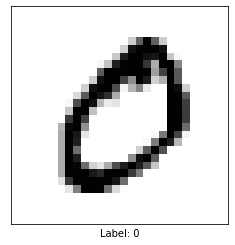

In [341]:
# the first few thousands examples of the dataset are zeros and the last few thousands are one 
helpers.plt.show_example(X_train[0], Y_train[0])

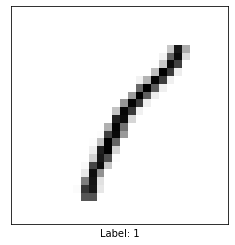

In [342]:
helpers.plt.show_example(X_train[-1], Y_train[-1])

# A Mini Batch of Examples

X_batch shape (1, 784)


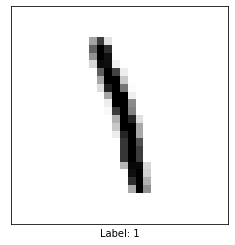

In [343]:
X_batch, Y_batch = helpers.dataset.get_random_batch(X_train, Y_train, 1)
print('X_batch shape', X_batch.shape)
helpers.plt.show_example(X_batch[0], Y_batch[0])

X_batch shape (1, 784)


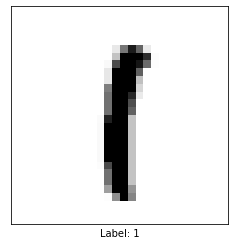

In [344]:
X_batch, Y_batch = helpers.dataset.get_random_batch(X_test, Y_test, 1)
print('X_batch shape', X_batch.shape)
helpers.plt.show_example(X_batch[0], Y_batch[0])

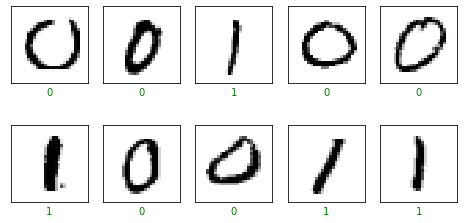

In [345]:
X_batch, Y_batch = helpers.dataset.get_random_batch(X_test, Y_test, 10)
helpers.plt.show_ten_examples(X_batch, Y_batch, Y_batch)


# Task 5: Create Model

A logistic model is simply a multi variable linear equation which gives a binary output. The pixel values of our input images are going to be the input features - the independent variables that form the logistic regression equation. And the class label - either 0 or 1 in our case, is the output y.

\begin{equation}
z = b + w_1x_1 + w_2x_2 + ... + w_N * x_N
\end{equation}

\begin{equation}
y = \sigma(z)
\end{equation}

To simplify, we can use vectorized represenation where X is the feature matrix and W is the weight matrix:

\begin{equation}
y = \sigma(W^T.X + b)
\end{equation}

In [346]:
class LogisticModel:
    def __init__(self, num_features):
        self.W = np.reshape(np.random.randn(num_features), (num_features, 1))
        self.b = np.zeros((1,1))
        self.num_features = num_features
        self.losses = []
        self.accuracy = []
        
    def summary(self):
        print('Number of features:', self.num_features)
        print('Shape of weights:', self.W.shape)
        print('Shape of biases:', self.b.shape)
        
model = LogisticModel(num_features=784)
model.summary()

Number of features: 784
Shape of weights: (784, 1)
Shape of biases: (1, 1)


# Forward Pass

For a single training example, the loss should be:

\begin{equation}
L(y, \hat{y}) = -(y * log(\hat{y}) + (1 - y) * log(1 - \hat{y}))
\end{equation}

In [347]:
class LogisticModel(LogisticModel):
    def _forward_pass(self, X, Y=None):
        batch_size = X.shape[0]
        Z = np.dot(X, self.W) + self.b
        A = 1./(1. + np.exp(-Z))
        loss = float(1e6)
        if Y is not None:
            loss = -1 * np.sum(Y*np.log(A) + (1-Y) * np.log(1-A))
            loss /= batch_size
        return A, loss    

# Backward Pass

In [348]:
class LogisticModel(LogisticModel):
    def _backward_pass(self, A, X, Y):
        dW = np.dot(np.transpose(X), A - Y) / batch_size
        db = np.sum(A-Y) / batch_size
        return dW, db

# Update Parameters

In [349]:
class LogisticModel(LogisticModel):
    def _update_params(self, dW, db, lr):
        self.W -= lr * dW
        self.b -= lr * db

# Check Model Performance

In [350]:
class LogisticModel(LogisticModel):
    def predict(self, X, Y=None):
        A, loss = self._forward_pass(X, Y)
        Y_pred = A > 0.5
        return np.squeeze(Y_pred), loss
    
    def evaluate(self, X, Y):
        Y_pred, loss = self.predict(X, Y)
        accuracy = np.sum(Y_pred == np.squeeze(Y)) / X.shape[0]
        return accuracy, loss
        
        

In [351]:
model = LogisticModel(num_features=784)
model.summary()

X, Y = helpers.dataset.get_random_batch(X_test, Y_test, batch_size)
acc, loss = model.evaluate(X, Y)
print('the accuracy of the untrained model is {}, the loss is {}'.format(acc, loss))

Number of features: 784
Shape of weights: (784, 1)
Shape of biases: (1, 1)
the accuracy of the untrained model is 0.58, the loss is 4.844155824483272


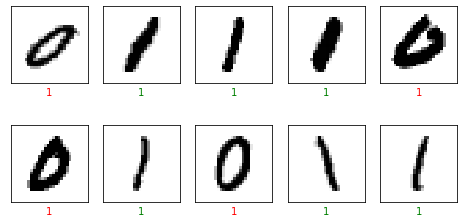

In [352]:
# the test of the untrained model

preds, _ = model.predict(X)
helpers.plt.show_ten_examples(X, Y, preds)

# Training Loop

In [353]:
class LogisticModel(LogisticModel):
    def train(self, batch_size, get_batch, lr, iterations, X_train, Y_train, X_test, Y_test):
        self.accuracies = []
        self.losses = []
        
        for i in range(iterations):
            X, Y = get_batch(X_train, Y_train, batch_size)
            A, _ = self._forward_pass(X, Y)
            dW, db = self._backward_pass(A, X, Y)
            self._update_params(dW, db, lr)

            X, Y = get_batch(X_test, Y_test, batch_size)
            val_acc, val_loss = self.evaluate(X, Y)
            self.accuracies.append(val_acc)
            self.losses.append(val_loss)
            print('Iter:{}, val_acc = {:.3f}, val_loss = {:.3f}'.format(i, val_acc, val_loss))  
           
        

# Training the Model

In [354]:
model = LogisticModel(784)
X, Y = helpers.dataset.get_random_batch(X_test, Y_test, batch_size)

print('before the training', model.evaluate(X, Y))

model.train(
    batch_size,
    helpers.dataset.get_random_batch,
    lr, 
    iterations, 
    X_train, Y_train, 
    X_test, Y_test
)

print('after the training', model.evaluate(X, Y))


before the training (0.6233333333333333, 2.470071029333745)
Iter:0, val_acc = 0.720, val_loss = 1.581
Iter:1, val_acc = 0.797, val_loss = 0.820
Iter:2, val_acc = 0.787, val_loss = 0.834
Iter:3, val_acc = 0.837, val_loss = 0.642
Iter:4, val_acc = 0.867, val_loss = 0.484
Iter:5, val_acc = 0.857, val_loss = 0.591
Iter:6, val_acc = 0.913, val_loss = 0.333
Iter:7, val_acc = 0.947, val_loss = 0.261
Iter:8, val_acc = 0.920, val_loss = 0.306
Iter:9, val_acc = 0.913, val_loss = 0.295
Iter:10, val_acc = 0.927, val_loss = 0.281
Iter:11, val_acc = 0.960, val_loss = 0.124
Iter:12, val_acc = 0.943, val_loss = 0.224
Iter:13, val_acc = 0.947, val_loss = 0.152
Iter:14, val_acc = 0.950, val_loss = 0.165
Iter:15, val_acc = 0.963, val_loss = 0.179
Iter:16, val_acc = 0.977, val_loss = 0.120
Iter:17, val_acc = 0.973, val_loss = 0.138
Iter:18, val_acc = 0.977, val_loss = 0.064
Iter:19, val_acc = 0.950, val_loss = 0.175
Iter:20, val_acc = 0.983, val_loss = 0.061
Iter:21, val_acc = 0.963, val_loss = 0.148
Iter

# Display the Results

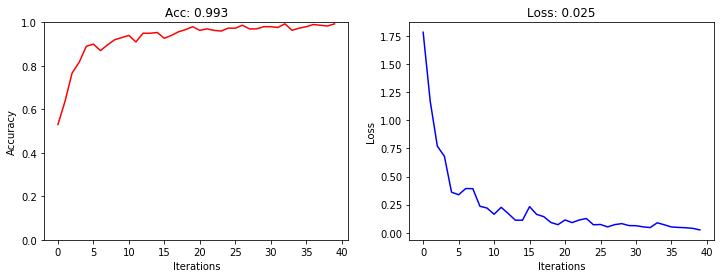

In [337]:
helpers.plt.plot_metrics(model)

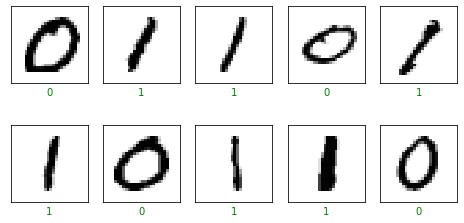

In [357]:
# the test of the trained model
preds, _ = model.predict(X, Y)
helpers.plt.show_ten_examples(X, Y, preds)